# Iris flower Classification

# Importing Dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Read Dataset

In [2]:
Col_names= ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
#Read Dataset
df=pd.read_csv("Iris.csv",header=None,names=Col_names)

# Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,146,6.7,3.0,5.2,2.3,Iris-virginica
147,147,6.3,2.5,5.0,1.9,Iris-virginica
148,148,6.5,3.0,5.2,2.0,Iris-virginica
149,149,6.2,3.4,5.4,2.3,Iris-virginica
150,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             151 non-null    object
 1   SepalLengthCm  151 non-null    object
 2   SepalWidthCm   151 non-null    object
 3   PetalLengthCm  151 non-null    object
 4   PetalWidthCm   151 non-null    object
 5   Species        151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,151,151,151,151,151,151
unique,151,36,24,44,23,4
top,Id,5.0,3.0,1.5,0.2,Iris-setosa
freq,1,10,26,14,28,50


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.nunique()

Id               151
SepalLengthCm     36
SepalWidthCm      24
PetalLengthCm     44
PetalWidthCm      23
Species            4
dtype: int64

# Label encoding

In [9]:
#Label encoding 
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Id']=lb.fit_transform(df['Id'])
df['SepalLengthCm']=lb.fit_transform(df['SepalLengthCm'])
df['SepalWidthCm']=lb.fit_transform(df['SepalWidthCm'])
df['PetalLengthCm']=lb.fit_transform(df['PetalLengthCm'])
df['PetalWidthCm']=lb.fit_transform(df['PetalWidthCm'])

# Defining X and Y

In [10]:
#defining X and Y
feature_cols = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_cols]# Features
y = df.Species # Target variable

# Importing the model

In [11]:
#Importing Model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Splitting into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Building the model

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Decision Tree Model accuracy score: 0.9836


In [15]:
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

# Fitting the model

In [16]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the model 

In [17]:
y_pred=Classifier.predict(X_test)

# Evaluating the model

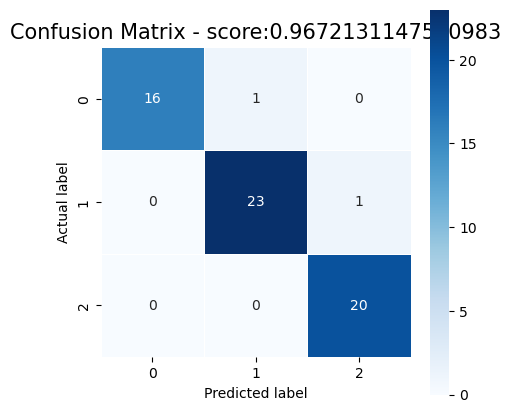

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sb.heatmap(cm,annot=True,fmt=".0f",linewidths=0.5,square=True,cmap='Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix - score:' +str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15);
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        17
Iris-versicolor       0.96      0.96      0.96        24
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.97        61
      macro avg       0.97      0.97      0.97        61
   weighted avg       0.97      0.97      0.97        61



# Checking the build model

In [20]:
X_test[0:1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,17,14,4,26,16


In [21]:
result=Classifier.predict(X_test[0:1])
result

array(['Iris-virginica'], dtype=object)